<a href="https://colab.research.google.com/github/Viaxiz/Machine-Learning-Study/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 导入相关包
import torch
import torchvision 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
# 查看pytorch版本和gpu是否可用
print(torch.__version__)
print(torch.cuda.is_available())

1.13.1+cu116
False


In [7]:
# 如果网络能在GPU中训练，就使用GPU；否则使用CPU进行训练
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# 这个函数包括了两个操作：将图片转换为张量，以及将图片进行归一化处理
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(mean = [0.5],std = [0.5])])
# 上面这句看到另一种写法，没测试过
# transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

                                
# 设置了每个包中的图片数据个数
BATCH_SIZE = 64
EPOCHS = 10

In [8]:
from torchvision import datasets, transforms

In [9]:
data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)
# root 指代文件保存位置
data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [10]:
# 建立一个数据迭代器
# 装载训练集
train_loader = torch.utils.data.DataLoader(dataset=data_train,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)
# 装载测试集
test_loader = torch.utils.data.DataLoader(dataset=data_test,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
# batch_size设置了每批装载的数据图片为64个，shuffle设置为True在装载过程中为随机乱序

In [11]:
# 看下训练集和测试集大小：数据集包含 60,000个训练集图像以及10,000个测试集图像。PS:数据集中每张图像的大小固定（28x28像素），上面的数字都经过了尺寸标准化及居中处理，数字范围从0到9，共10个模式
print(len(data_train),len(data_test))

60000 10000


[tensor(2), tensor(0), tensor(0), tensor(5), tensor(6), tensor(1), tensor(6), tensor(4), tensor(4), tensor(8), tensor(8), tensor(6), tensor(8), tensor(9), tensor(9), tensor(7), tensor(7), tensor(8), tensor(3), tensor(4), tensor(7), tensor(7), tensor(6), tensor(5), tensor(1), tensor(1), tensor(9), tensor(7), tensor(4), tensor(0), tensor(6), tensor(1), tensor(6), tensor(7), tensor(1), tensor(8), tensor(6), tensor(8), tensor(0), tensor(0), tensor(7), tensor(0), tensor(4), tensor(4), tensor(7), tensor(2), tensor(5), tensor(1), tensor(6), tensor(6), tensor(9), tensor(0), tensor(3), tensor(1), tensor(8), tensor(4), tensor(7), tensor(5), tensor(4), tensor(1), tensor(9), tensor(6), tensor(8), tensor(7)]


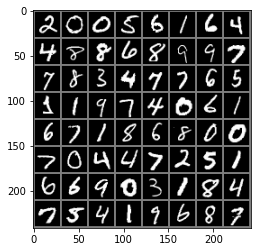

In [12]:
images, labels = next(iter(train_loader))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

# 下面构建数据训练模型并创建实例
参考：
[1]https://github.com/JaimeTang/PyTorch-and-mnist/blob/master/pytorch-and-mnist.ipynb

[2]https://zhuanlan.zhihu.com/p/30249139

In [ ]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = torch.nn.Sequential(torch.nn.Conv2d(1,64,kernel_size=3,stride=1,padding=1),
                                         torch.nn.ReLU(),
                                         torch.nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(stride=2,kernel_size=2))
        self.dense = torch.nn.Sequential(torch.nn.Linear(14*14*128,1024),
                                         torch.nn.ReLU(),
                                         torch.nn.Dropout(p=0.5),
                                         torch.nn.Linear(1024, 10))
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(-1, 14*14*128)
        x = self.dense(x)
        return x

# 完成数据装载后就可以构建核心程序了，这里构建的是一个包含了卷积层和全连接层的神经网络，其中卷积层使用torch.nn.Conv2d来构建，
# 激活层使用torch.nn.ReLU来构建，池化层使用torch.nn.MaxPool2d来构建，全连接层使用torch.nn.Linear来构建

# 其中定义了torch.nn.Dropout(p=0.5)防止模型的过拟合

# forward函数定义了前向传播，其实就是正常卷积路径。首先经过self.conv1(x)卷积处理，然后进行x.view(-1, 14*14*128)压缩扁平化处理，最后通过self.dense(x)全连接进行分类



In [ ]:
# 在训练前可以查看神经网络架构了，print输出显示如下
print(Model())

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


模型训练过程

In [ ]:
# 对Model对象进行调用，然后定义loss计算使用交叉熵，优化计算使用Adam自动化方式，最后就可以开始训练了
model = Model()
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# 定义训练次数为5次
n_epochs = 5
# 
# model.load_state_dict(torch.load('model_parameter.pkl'))

In [ ]:
# 忘了导入这步
from torch.autograd import Variable

In [ ]:
for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    print("Epoch {}/{}".format(epoch, n_epochs))
    print("-"*10)
    for data in train_loader:
        X_train, y_train = data
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = model(X_train)
        _,pred = torch.max(outputs.data, 1)
        optimizer.zero_grad()
        loss = cost(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_correct += torch.sum(pred == y_train.data)
    testing_correct = 0
    for data in test_loader:
        X_test, y_test = data
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = model(X_test)
        _, pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test.data)
    print("Loss is:{:.4f}, Train Accuracy is:{:.4f}%, Test Accuracy is:{:.4f}".format(running_loss/len(data_train),
                                                                                      100*running_correct/len(data_train),
                                                                                      100*testing_correct/len(data_test)))
# 训练完成后还可以保存训练得到的参数，方便下次导入后可供直接使用
torch.save(model.state_dict(), "model_parameter.pkl")

Epoch 0/5
----------
Loss is:0.0020, Train Accuracy is:96.1850%, Test Accuracy is:98.1700
Epoch 1/5
----------
Loss is:0.0007, Train Accuracy is:98.6133%, Test Accuracy is:98.6700
Epoch 2/5
----------
Loss is:0.0005, Train Accuracy is:99.0400%, Test Accuracy is:98.7500
Epoch 3/5
----------
Loss is:0.0003, Train Accuracy is:99.3633%, Test Accuracy is:98.6400
Epoch 4/5
----------
Loss is:0.0003, Train Accuracy is:99.4517%, Test Accuracy is:98.4700


Predict Label is: [tensor(0), tensor(3), tensor(8), tensor(1)]
Real Label is: [tensor(0), tensor(3), tensor(8), tensor(1)]


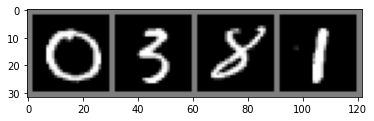

In [19]:
# 预测的代码，随机对几张测试集的图片进行预测，并做可视化展示
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                          batch_size = 4,
                                          shuffle = True)
X_test, y_test = next(iter(data_loader_test))
inputs = Variable(X_test)
pred = model(inputs)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data])
print("Real Label is:",[i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.numpy().transpose(1,2,0)

std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
plt.imshow(img)

# 另外一种写法
参考：[1]https://matpool.com/learn/article/pytorch-mnist-train-on-matpool

构建数据模型并创建实例

In [13]:
# 一个简单的卷积神经网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.model = torch.nn.Sequential(
            #The size of the picture is 28x28
            torch.nn.Conv2d(in_channels = 1,out_channels = 16,kernel_size = 3,stride = 1,padding = 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2,stride = 2),
            
            #The size of the picture is 14x14
            torch.nn.Conv2d(in_channels = 16,out_channels = 32,kernel_size = 3,stride = 1,padding = 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2,stride = 2),
            
            #The size of the picture is 7x7
            torch.nn.Conv2d(in_channels = 32,out_channels = 64,kernel_size = 3,stride = 1,padding = 1),
            torch.nn.ReLU(),
            
            torch.nn.Flatten(),
            torch.nn.Linear(in_features = 7 * 7 * 64,out_features = 128),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features = 128,out_features = 10),
            torch.nn.Softmax(dim=1)
        )
        
    def forward(self,input):
        output = self.model(input)
        return output

In [14]:
# 打印模型
print(Net())


Net(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=3136, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [15]:
# 构建模型实例
net = Net()
# 将模型转换到device中，并将其结构显示出来
print(net.to(device))

Net(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=3136, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


构建迭代器与损失函数

In [16]:
# 交叉熵损失来作为损失函数
# Adam迭代器
loss_fun = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(net.parameters())

In [17]:
# 构建并运行训练循环
history = {'Test Loss':[],'Test Accuracy':[]}
for epoch in range(1,EPOCHS + 1):
    process_bar = tqdm(train_loader,unit = 'step')
    net.train(True)
    for step,(train_imgs,labels) in enumerate(process_bar):
        train_imgs = train_imgs.to(device)
        labels = labels.to(device)

        net.zero_grad()
        outputs = net(train_imgs)
        loss = loss_fun(outputs,labels)
        predictions = torch.argmax(outputs, dim = 1)
        accuracy = torch.true_divide(torch.sum(predictions == labels), labels.shape[0])
        loss.backward()

        optimizer.step()
        process_bar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f" % 
                                   (epoch,EPOCHS,loss.item(),accuracy.item()))
        
        if step == len(process_bar)-1:
            correct,total_loss = 0,0
            net.train(False)
            with torch.no_grad():
                for test_imgs,labels in test_loader:
                    test_imgs = test_imgs.to(device)
                    labels = labels.to(device)
                    outputs = net(test_imgs)
                    loss = loss_fun(outputs,labels)
                    predictions = torch.argmax(outputs,dim = 1)

                    total_loss += loss
                    correct += torch.sum(predictions == labels)

                test_accuracy = torch.true_divide(correct, (BATCH_SIZE * len(test_loader)))
                test_loss = torch.true_divide(total_loss, len(test_loader))
                history['Test Loss'].append(test_loss.item())
                history['Test Accuracy'].append(test_accuracy.item())
            
            process_bar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f, Test Loss: %.4f, Test Acc: %.4f" % 
                                   (epoch,EPOCHS,loss.item(),accuracy.item(),test_loss.item(),test_accuracy.item()))
    process_bar.close()

[1/10] Loss: 1.5237, Acc: 0.9688, Test Loss: 1.4954, Test Acc: 0.9632: 100%|██████████| 938/938 [01:13<00:00, 12.71step/s]
[2/10] Loss: 1.5331, Acc: 0.9688, Test Loss: 1.4819, Test Acc: 0.9749: 100%|██████████| 938/938 [01:14<00:00, 12.57step/s]
[3/10] Loss: 1.4612, Acc: 1.0000, Test Loss: 1.4786, Test Acc: 0.9780: 100%|██████████| 938/938 [01:14<00:00, 12.62step/s]
[4/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.4771, Test Acc: 0.9793: 100%|██████████| 938/938 [01:13<00:00, 12.72step/s]
[5/10] Loss: 1.5236, Acc: 0.9688, Test Loss: 1.4743, Test Acc: 0.9826: 100%|██████████| 938/938 [01:20<00:00, 11.67step/s]
[6/10] Loss: 1.5226, Acc: 0.9688, Test Loss: 1.4730, Test Acc: 0.9837: 100%|██████████| 938/938 [01:24<00:00, 11.13step/s]
[7/10] Loss: 1.4612, Acc: 1.0000, Test Loss: 1.4724, Test Acc: 0.9838: 100%|██████████| 938/938 [01:34<00:00,  9.96step/s]
[8/10] Loss: 1.4622, Acc: 0.9375, Test Loss: 1.4726, Test Acc: 0.9839: 100%|██████████| 938/938 [01:46<00:00,  8.79step/s]
[9/10] Loss: 1.4

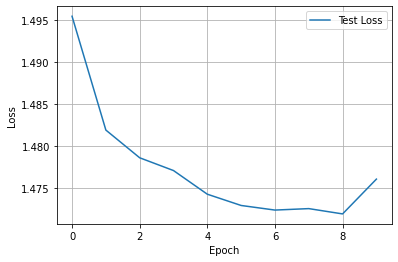

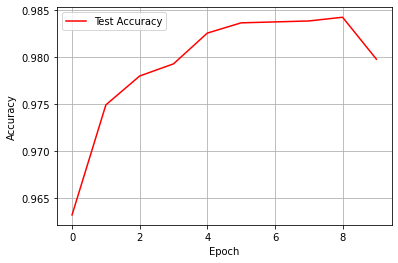

In [18]:
#训练结果可视化
#对测试Loss进行可视化
plt.plot(history['Test Loss'],label = 'Test Loss')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#对测试准确率进行可视化
plt.plot(history['Test Accuracy'],color = 'red',label = 'Test Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [19]:
# 保存训练好的模型
torch.save(net,'torch_mnist_model.pth')